In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File paths for each CSV
csv_paths = {
    "patients": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/patient_data_large.csv',
    "consultations": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/consultation_data_large.csv',
    "neurosurgeons": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/neurosurgeon_data_large.csv',
    "surgeries": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/surgery_data_large.csv',
    "insurance": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/insurance.csv',
    "specialty": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/specialty.csv',
    "diseases": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/diseases.csv',
    "patient_disease": 'C:/Users/Admin/Downloads/NeuroSurgeryDB_Project/patient_disease_data.csv'
}

# Load each CSV into respective DataFrames
patients_df = pd.read_csv(csv_paths['patients'])
consultation_df = pd.read_csv(csv_paths['consultations'])
neurosurgeon_df = pd.read_csv(csv_paths['neurosurgeons'])
surgeries_df = pd.read_csv(csv_paths['surgeries'])
insurance_df = pd.read_csv(csv_paths['insurance'])
specialty_df = pd.read_csv(csv_paths['specialty'])
diseases_df = pd.read_csv(csv_paths['diseases'])
patient_disease_df = pd.read_csv(csv_paths['patient_disease'])

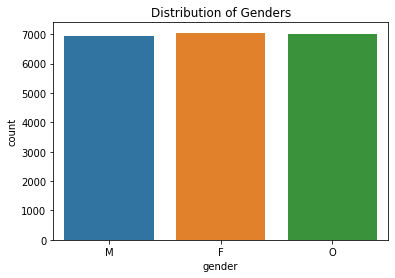

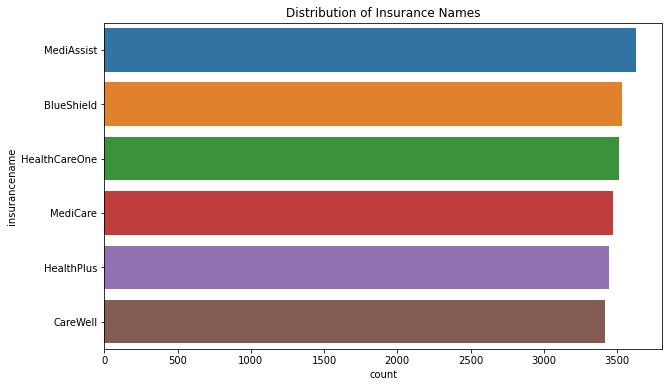

In [3]:
# Distribution of genders
sns.countplot(x='gender', data=patients_df)
plt.title('Distribution of Genders')
plt.show()

# Distribution of insurance names
plt.figure(figsize=(10, 6))
sns.countplot(y='insurancename', data=patients_df, order=patients_df['insurancename'].value_counts().index)
plt.title('Distribution of Insurance Names')
plt.show()

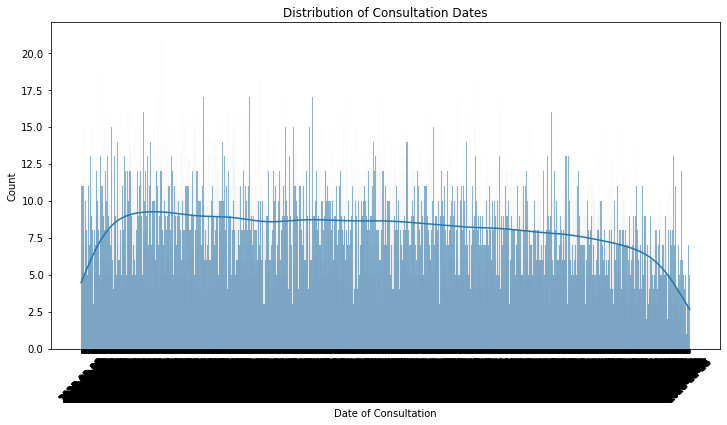

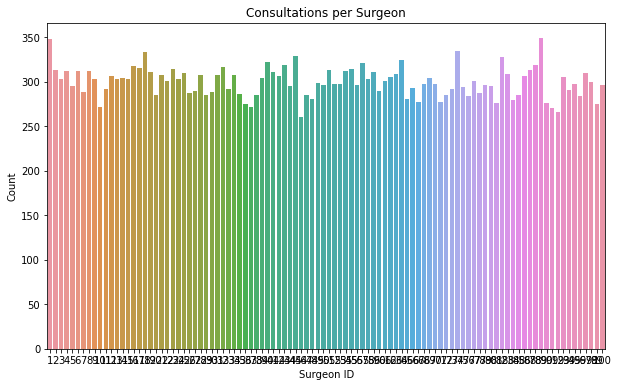

In [4]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(consultation_df['doc'], bins=50, kde=True)
plt.title('Distribution of Consultation Dates')
plt.xlabel('Date of Consultation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Example: Surgeon-wise consultations
plt.figure(figsize=(10, 6))
sns.countplot(x='surgeonid', data=consultation_df)
plt.title('Consultations per Surgeon')
plt.xlabel('Surgeon ID')
plt.ylabel('Count')
plt.show()

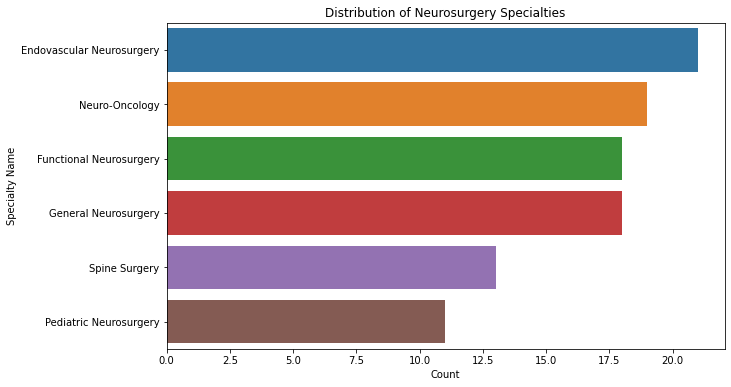

In [5]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(y='specialtyname', data=neurosurgeon_df, order=neurosurgeon_df['specialtyname'].value_counts().index)
plt.title('Distribution of Neurosurgery Specialties')
plt.ylabel('Specialty Name')
plt.xlabel('Count')
plt.show()


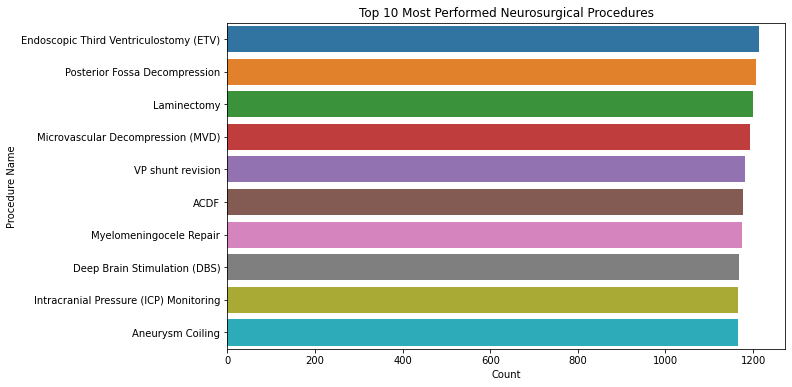

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(y='procedurename', data=surgeries_df, order=surgeries_df['procedurename'].value_counts().index[:10])
plt.title('Top 10 Most Performed Neurosurgical Procedures')
plt.ylabel('Procedure Name')
plt.xlabel('Count')
plt.show()

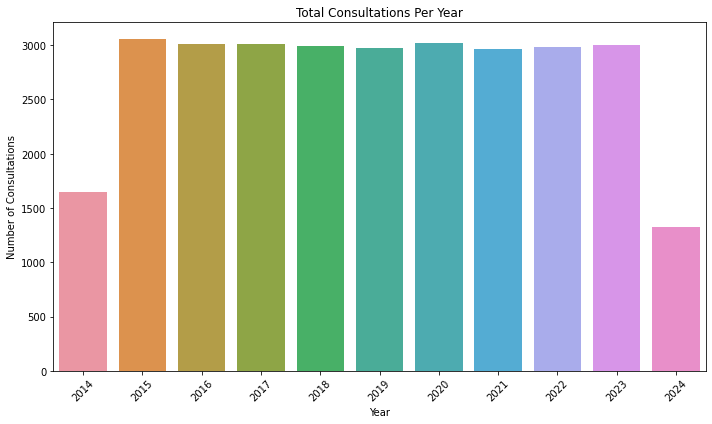

In [7]:
# Convert 'doc' column to datetime format
consultation_df['doc'] = pd.to_datetime(consultation_df['doc'])

# Extract year from 'doc' column
consultation_df['year'] = consultation_df['doc'].dt.year

# Calculate total consultations per year
consultations_per_year = consultation_df['year'].value_counts().sort_index()

# Plotting total consultations per year
plt.figure(figsize=(10, 6))
sns.barplot(x=consultations_per_year.index, y=consultations_per_year.values)
plt.title('Total Consultations Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Consultations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
patients_with_surgery = surgeries_df['patientid'].unique()
patients_df['had_surgery'] = patients_df['patientid'].apply(lambda x: 'Had Surgery' if x in patients_with_surgery else 'Did Not Have Surgery')

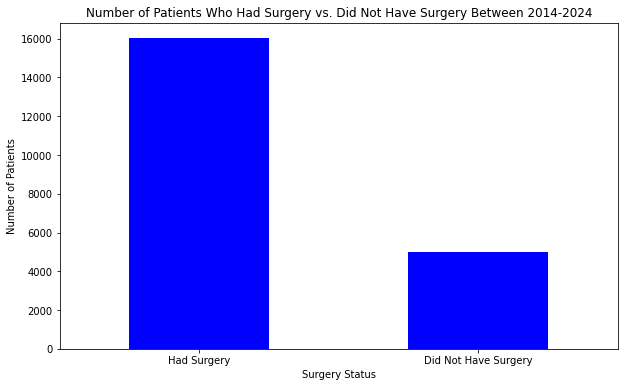

In [11]:
# Count the number of patients in each category
surgery_counts = patients_df['had_surgery'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
surgery_counts.plot(kind='bar', color=['blue', 'blue'])
plt.title('Number of Patients Who Had Surgery vs. Did Not Have Surgery Between 2014-2024')
plt.xlabel('Surgery Status')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Number of Patients who had Surgery Vs didn't have Surgery at the Neurosurgery Department between 2014 - 2024